In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


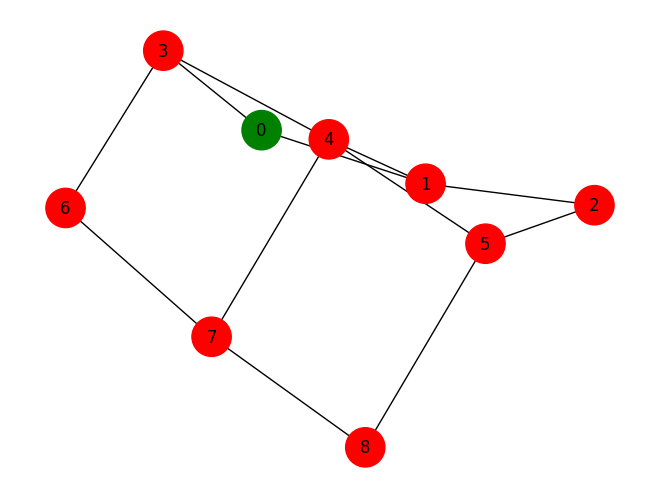

In [2]:
rede = Network()
controller = Controller(rede)
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com 8 clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

In [3]:
# # Geração de uma requisição para teste
# alice_id = random.randint(1, 8)
# bob_id = 0
# num_qubits = 5
# num_gates = 30

# request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
# rede.execute_request(request)


In [4]:
# for _ in range(2):  
#     alice_id = random.randint(1, 8)  
#     bob_id = 0  
#     num_qubits = random.randint(3, 6)  
#     num_gates = random.randint(20, 30)  

#     # Gera uma requisição e a envia ao controlador
#     request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
#     controller.receive_request(request)

# # Agenda as requisições recebidas no controlador
# controller.schedule_requests(controller.pending_requests)

# # Executa as requisições agendadas na rede
# controller.send_scheduled_requests()

# controller.generate_schedule_report()


In [5]:
for _ in range(5):  
    alice_id = random.randint(1, 8)  # ID de Alice (nós aleatórios)
    bob_id = 0  # ID fixo de Bob
    num_qubits = random.randint(3, 6)  # Número de qubits
    num_gates = random.randint(20, 30)  # Número de portas no circuito

    # Gera uma requisição e a envia ao controlador
    request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
    controller.receive_request(request)

# Agenda as requisições recebidas no controlador
controller.schedule_requests(controller.pending_requests)

# Executa as requisições agendadas na rede
controller.send_scheduled_requests()

# Gera um relatório detalhado das requisições processadas
controller.generate_schedule_report()



             ┌───┐           ┌───┐        ┌───┐                  ┌───┐        »
q_0: ─■───■──┤ Y ├──────X──■─┤ X ├──────■─┤ T ├────────────────■─┤ Z ├─■───■──»
      │   │  └───┘      │  │ └─┬─┘      │ └───┘┌───┐┌───┐┌───┐ │ └───┘ │   │  »
q_1: ─┼───■─────────────┼──┼───┼────■───┼───X──┤ S ├┤ Z ├┤ Z ├─■───────■───┼──»
      │ ┌───┐┌───┐┌───┐ │  │   │  ┌─┴─┐ │   │  └───┘└───┘└───┘           ┌─┴─┐»
q_2: ─■─┤ S ├┤ Z ├┤ T ├─X──■───■──┤ X ├─■───X────────────────────────────┤ X ├»
        └───┘└───┘└───┘           └───┘                                  └───┘»
«     ┌───┐     ┌───┐     ┌───┐
«q_0: ┤ T ├──■──┤ H ├──X──┤ S ├
«     └───┘  │  └───┘  │  ├───┤
«q_1: ───────┼─────────X──┤ Y ├
«          ┌─┴─┐┌───┐┌───┐└───┘
«q_2: ─────┤ X ├┤ H ├┤ S ├─────
«          └───┘└───┘└───┘     


C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-11-21 11:24:22,530: Circuito aleatório gerado com 3 qubits e 28 portas.
2024-11-21 11:24:22,530: Instrução: {'operation': 'cz', 'qubits': [2, 0]}
2024-11-21 11:24:22,530: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-11-21 11:24:22,530: Instrução: {'operation': 's', 'qubits': [2]}
2024-11-21 11:24:22,530: Instrução: {'operation': 'z', 'qubits': [2]}
2024-11-21 11:24:22,536: Instrução: {'operation': 't', 'qubits': [2]}
2024-11-21 11:24:22,536: Instrução: {'operation': 'y', 'qubits': [0]}
2024-11-21 11:24:22,538: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-11-21 11:24:22,538: Instruç

                          ┌───┐┌───┐                                          »
q_0: ──────X────────────■─┤ Z ├┤ Y ├────────────────────────■───────────────■─»
     ┌───┐ │            │ └───┘└───┘                        │         ┌───┐ │ »
q_1: ┤ T ├─X────────────┼─────────────■───■─────────────────┼───■───■─┤ T ├─┼─»
     └───┘              │             │   │      ┌───┐┌───┐ │ ┌─┴─┐ │ ├───┤ │ »
q_2: ──────■───X────────┼───■────■────■───┼──────┤ X ├┤ H ├─┼─┤ X ├─┼─┤ X ├─■─»
     ┌───┐ │   │  ┌───┐ │   │  ┌─┴─┐      │ ┌───┐└─┬─┘├───┤ │ └───┘ │ └───┘   »
q_3: ┤ Z ├─┼───X──┤ H ├─┼───■──┤ X ├──────■─┤ Z ├──■──┤ Y ├─■───────■─────────»
     └───┘ │ ┌───┐└───┘ │ ┌───┐├───┤┌───┐   └───┘     └───┘                   »
q_4: ──────■─┤ Z ├──────■─┤ T ├┤ T ├┤ H ├─────────────────────────────────────»
             └───┘        └───┘└───┘└───┘                                     »
«               ┌───┐
«q_0: ───────■──┤ X ├
«            │  └─┬─┘
«q_1: ───────┼────┼──
«     ┌───┐  │    │  
«q_2: ┤ Y 

2024-11-21 11:24:22,957: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-21 11:24:22,957: Instrução: {'operation': 'z', 'qubits': [3]}
2024-11-21 11:24:22,957: Instrução: {'operation': 't', 'qubits': [1]}
2024-11-21 11:24:22,957: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2024-11-21 11:24:22,963: Instrução: {'operation': 'swap', 'qubits': [0, 1]}
2024-11-21 11:24:22,963: Instrução: {'operation': 'z', 'qubits': [4]}
2024-11-21 11:24:22,964: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-11-21 11:24:22,964: Instrução: {'operation': 'h', 'qubits': [3]}
2024-11-21 11:24:22,964: Instrução: {'operation': 'cz', 'qubits': [3, 2]}
2024-11-21 11:24:22,971: Instrução: {'operation': 'cx', 'qubits': [2, 3]}
2024-11-21 11:24:22,971: Instrução: {'operation': 'cz', 'qubits': [1, 2]}
2024-11-21 11:24:22,971: Instrução: {'operation': 'cz', 'qubits': [4, 0]}
2024-11-21 11:24:22,971: Instrução: {'operation': 'cz', 'qubits': [1, 3]}
2024-11-21 11:24:22,978: Instrução: {'operation

          ┌───┐      ┌───┐┌───┐                                     ┌───┐
q_0: ──■──┤ T ├─■──■─┤ Z ├┤ X ├──X───────────X───■───X──■────────■──┤ Y ├
       │  └───┘ │  │ ├───┤└───┘  │  ┌───┐    │ ┌─┴─┐ │  │        │  └───┘
q_1: ──┼────────■──┼─┤ H ├───────X──┤ T ├────┼─┤ X ├─┼──┼───■────┼───────
       │           │ └───┘┌───┐     └───┘    │ └───┘ │  │   │  ┌─┴─┐┌───┐
q_2: ──┼───────────┼───■──┤ Y ├───────────■──┼───────┼──■───┼──┤ X ├┤ Z ├
     ┌─┴─┐         │   │  ├───┤┌───┐┌───┐ │  │       │    ┌─┴─┐└───┘└───┘
q_3: ┤ X ├─────────■───■──┤ S ├┤ Z ├┤ H ├─■──X───────X────┤ X ├──────────
     └───┘                └───┘└───┘└───┘                 └───┘          


2024-11-21 11:24:23,283: Circuito aleatório gerado com 4 qubits e 23 portas.
2024-11-21 11:24:23,289: Instrução: {'operation': 'cx', 'qubits': [0, 3]}
2024-11-21 11:24:23,290: Instrução: {'operation': 't', 'qubits': [0]}
2024-11-21 11:24:23,290: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-11-21 11:24:23,291: Instrução: {'operation': 'cz', 'qubits': [0, 3]}
2024-11-21 11:24:23,291: Instrução: {'operation': 'z', 'qubits': [0]}
2024-11-21 11:24:23,293: Instrução: {'operation': 'cz', 'qubits': [2, 3]}
2024-11-21 11:24:23,294: Instrução: {'operation': 's', 'qubits': [3]}
2024-11-21 11:24:23,295: Instrução: {'operation': 'z', 'qubits': [3]}
2024-11-21 11:24:23,296: Instrução: {'operation': 'h', 'qubits': [1]}
2024-11-21 11:24:23,296: Instrução: {'operation': 'y', 'qubits': [2]}
2024-11-21 11:24:23,298: Instrução: {'operation': 'x', 'qubits': [0]}
2024-11-21 11:24:23,298: Instrução: {'operation': 'h', 'qubits': [3]}
2024-11-21 11:24:23,299: Instrução: {'operation': 'swap', 'qubits':

     ┌───┐               ┌───┐┌───┐        ┌───┐┌───┐┌───┐     ┌───┐┌───┐      »
q_0: ┤ X ├───────────────┤ X ├┤ Z ├──────X─┤ T ├┤ T ├┤ Z ├──■──┤ X ├┤ H ├──────»
     └───┘┌───┐     ┌───┐└─┬─┘└───┘┌───┐ │ ├───┤└───┘├───┤  │  └─┬─┘└───┘      »
q_1: ─────┤ X ├─────┤ X ├──┼────■──┤ Y ├─┼─┤ H ├──■──┤ Y ├──┼────┼────────■──■─»
     ┌───┐└─┬─┘┌───┐└─┬─┘  │    │  ├───┤ │ └───┘  │  └───┘┌─┴─┐  │        │  │ »
q_2: ┤ Y ├──■──┤ Y ├──┼────■────┼──┤ Y ├─X────────┼───────┤ X ├──■────■───┼──┼─»
     ├───┤     └───┘  │         │  ├───┤          │       └───┘     ┌─┴─┐ │  │ »
q_3: ┤ X ├────────────■─────────■──┤ Y ├──────────■─────────────────┤ X ├─■──■─»
     └───┘                         └───┘                            └───┘      »
«                       
«q_0: ───────────X──────
«          ┌───┐ │ ┌───┐
«q_1: ──■──┤ Y ├─┼─┤ H ├
«       │  └───┘ │ └───┘
«q_2: ──■────────X──────
«     ┌───┐             
«q_3: ┤ H ├─────────────
«     └───┘             


2024-11-21 11:24:23,565: Instrução: {'operation': 'y', 'qubits': [2]}
2024-11-21 11:24:23,568: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2024-11-21 11:24:23,571: Instrução: {'operation': 'z', 'qubits': [0]}
2024-11-21 11:24:23,573: Instrução: {'operation': 'cx', 'qubits': [3, 1]}
2024-11-21 11:24:23,573: Instrução: {'operation': 'y', 'qubits': [2]}
2024-11-21 11:24:23,580: Instrução: {'operation': 'cz', 'qubits': [1, 3]}
2024-11-21 11:24:23,580: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-11-21 11:24:23,580: Instrução: {'operation': 't', 'qubits': [0]}
2024-11-21 11:24:23,588: Instrução: {'operation': 'y', 'qubits': [1]}
2024-11-21 11:24:23,588: Instrução: {'operation': 'y', 'qubits': [3]}
2024-11-21 11:24:23,621: Instrução: {'operation': 'h', 'qubits': [1]}
2024-11-21 11:24:23,621: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-11-21 11:24:23,621: Instrução: {'operation': 'y', 'qubits': [1]}
2024-11-21 11:24:23,621: Instrução: {'operation': 't', 'qubits': [0]

        ┌───┐          ┌───┐┌───┐┌───┐                     ┌───┐           »
q_0: ─■─┤ T ├──■────X──┤ H ├┤ X ├┤ X ├──────X───────────■──┤ X ├──■───■────»
      │ └───┘  │    │  ├───┤├───┤├───┤┌───┐ │    ┌───┐┌─┴─┐├───┤  │   │    »
q_1: ─┼────────┼────X──┤ T ├┤ H ├┤ T ├┤ Y ├─┼──X─┤ T ├┤ X ├┤ H ├──┼───┼──■─»
      │      ┌─┴─┐┌───┐├───┤└───┘└───┘└───┘ │  │ └───┘└───┘└───┘┌─┴─┐ │  │ »
q_2: ─■──────┤ X ├┤ T ├┤ X ├────────────────X──X────────────────┤ X ├─■──■─»
             └───┘└───┘└───┘                                    └───┘      »
«                
«q_0: ──■───X──X─
«       │   │  │ 
«q_1: ──┼───X──┼─
«     ┌─┴─┐    │ 
«q_2: ┤ X ├────X─
«     └───┘      


2024-11-21 11:24:23,906: Circuito aleatório gerado com 3 qubits e 25 portas.
2024-11-21 11:24:23,906: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-11-21 11:24:23,913: Instrução: {'operation': 't', 'qubits': [0]}
2024-11-21 11:24:23,913: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-11-21 11:24:23,915: Instrução: {'operation': 't', 'qubits': [2]}
2024-11-21 11:24:23,915: Instrução: {'operation': 'swap', 'qubits': [0, 1]}
2024-11-21 11:24:23,916: Instrução: {'operation': 'h', 'qubits': [0]}
2024-11-21 11:24:23,916: Instrução: {'operation': 't', 'qubits': [1]}
2024-11-21 11:24:23,916: Instrução: {'operation': 'x', 'qubits': [0]}
2024-11-21 11:24:23,918: Instrução: {'operation': 'h', 'qubits': [1]}
2024-11-21 11:24:23,918: Instrução: {'operation': 't', 'qubits': [1]}
2024-11-21 11:24:23,920: Instrução: {'operation': 'x', 'qubits': [2]}
2024-11-21 11:24:23,920: Instrução: {'operation': 'y', 'qubits': [1]}
2024-11-21 11:24:23,921: Instrução: {'operation': 'x', 'qubits': [0]}

Nenhuma requisição foi agendada.
